*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module03_linear_regression_01.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


# Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/)*

### Regression problems

The two primary types of machine learning problems we will focus on in this course are:

* **Classification problems:** supervised learning problems with a categorical response
* **Regression problems**: supervised learning problems with a continuous response

In this notebook we will learn one of the simplest methods for regression, namely **Linear regression**.

Why learn linear regression?

- Fast
- Easy to use
- Interpretable
- Basis for many other methods


### The advertising data

To illustrate the concept of linear regression we will use a dataset that describes product sales as a function of advertising.

What are the examples?

- Each example represents a product in a given market with a total of 200 in the dataset.

What are the features?

- **TV:** advertising dollars spent on TV ads 
- **radio:** advertising dollars spent on radio ads
- **newspaper:** advertising dollars spent on newspaper ads

All expenditures are in thousands of dollars.

What are the labels?

- **sales:** sales of a product in a given market (in thousands of widgets)


In [2]:
# read data into a pandas DataFrame
import pandas as pd
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
len(data)

200

### How can you help?

You are asked by the company: On the basis of this data, how should we spend our advertising money?

As their machine learning / data scientist, you offer more specific help:

* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type on sales?
* Given ad spending in a particular market, can sales be predicted?


### Visualizing the data

We'll use a **scatter plot** to visualize the relationship between the features and the labels.

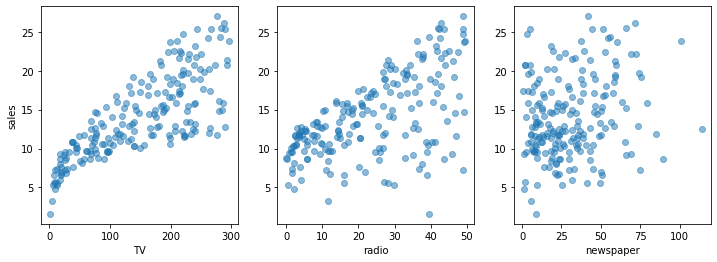

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.scatter(data['TV'], data['sales'], alpha=0.5)
ax1.set_xlabel('TV')
ax1.set_ylabel('sales')
ax2.scatter(data['radio'], data['sales'], alpha=0.5)
ax2.set_xlabel('radio')
ax3.scatter(data['newspaper'], data['sales'], alpha=0.5)
ax3.set_xlabel('newspaper');


We can quantify the relationships between variables by computing the correlation matrix:

In [5]:
# compute the correlation matrix
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Correlation is a quantification of the strength of the linear relationship between two variables.  We observe that the amount spent on TV ads is the most predictive of sales.  Let's construct a model that predicts sales from TV ads alone.  First extract the necessary data:

In [6]:
# create feature matrix and vector of labels
X = data[['TV']].values
y = data['sales'].values
X.shape, y.shape

((200, 1), (200,))

In [7]:
np.corrcoef(X[:,0],y)

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

Note that the array containing the features is a matrix with a single column.
Next, we will use scikit-learn to perform linear regression to predict sales:

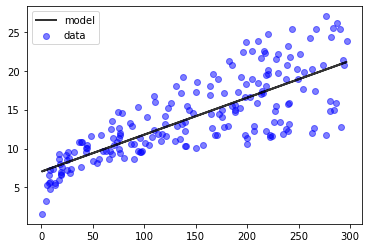

In [8]:
from sklearn.linear_model import LinearRegression

# instantiate, fit, and predict:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# plot the reslts
plt.scatter(X, y,  color='blue', alpha=0.5, label = 'data')
plt.plot(X, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
plt.legend(loc="best");

### Linear regression in one dimension

In one dimension, linear regression takes the following form:

$$y =  wx + b$$

where:

- $y$ is the label
- $x$ is the feature
- $b$ is the bias, or intercept in this case
- $w$ is the parameter corresponding to x

$w$ and $b$ are the **model parameters**, which are learned during the training process.  The resulting model can then be used to predict the label, which in the context of regression, is also called the *response*.


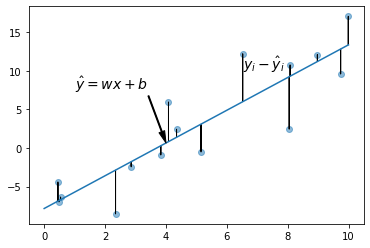

In [9]:
# create some random data
from numpy.random import default_rng
rng = default_rng(5)
x = 10 * rng.random(15)
y = 2 * x - 5 + rng.standard_normal(15)* 5

# instantiate and fit
model = LinearRegression()
model.fit(x[:, np.newaxis], y)

# data for plotting the regression line
xs = np.linspace(0, 10, 1000)
ys = model.predict(xs[:, np.newaxis])

# plot the regression line
plt.scatter(x, y, alpha=0.5)
plt.plot(xs, ys)

# the predictions over the training data
y_hat = model.predict(x[:, np.newaxis])

for i in range(len(x)):
    plt.arrow(x[i],y_hat[i], 0, y[i]-y_hat[i])
plt.text(x[10], y[10]-2, r'$y_i-\hat{y}_i$', fontsize = 14);
plt.annotate(r'$\hat{y} = wx + b$', fontsize=14, xy=(xs[400], ys[400]), 
             xytext=(xs[400]-3, ys[400]+7),
             arrowprops=dict(facecolor='black',width=1,headwidth=6));

### Learning the model 

- Coefficients are estimated during the model fitting process using the **least squares criterion**.
- We seek to find the line that minimizes the **sum of squared error** illustrated in the figure above.

In this figure:

- The dots are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The black lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model parameters relate to the least squares line?

- $w$ is the **slope**
- $b$ is the **intercept** (the value of $y$ when $x$=0)

The parameters $(w,b)$ are chosen as to minimize the sum-squared error:
$$
J( w,b ) = \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$

where $y_i$ are the known labels and $\hat{y}_i = w x_i + b$ are the predicted labels.

### Interpreting model parameters

The regression coefficient $w$ which corresponds to the TV feature has the following interpretation:

- A unit increase in TV ad spending is associated with an increase of $w$ units in sales.
- This is not a statement of **causation**.

If an increase in TV ad spending was associated with a **decrease** in sales, $w$ would be **negative**.

Let's test this out on the advertising data:

In [10]:
# create X and y
X = data[['TV']].values
y = data['sales'].values

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

7.032593549127693
[0.04753664]


### Using the model for prediction

Let's say that there was a new market where the TV advertising budget was **$50,000**. What would be the predicted sales in that market?


In [11]:
# compute using the formula w * x + b:
linreg.coef_[0] * 50 + linreg.intercept_

9.409425570778682

In [12]:
# or using the predict method:
linreg.predict(np.array([[50]]))

array([9.40942557])

### Exercise:  toy data

Create one-dimensional regression data using scikit-learn's [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression).  Use linear regression to create a model and plot the resulting fitted line.  Evaluate the quality of the model on a separate test set using the Root-Mean-Square Error (RMSE) which is the square root of the mean of the squared errors:

$$\mathrm{RMSE} = \sqrt{\frac 1N\sum_{i=1}^N(y_i-\hat{y}_i)^2}$$

Compare the RMSE on the training set with the RMSE on the test set.
In implementing the RMSE calculation, avoid using a for loop!

Note that `make_regression` has a `noise` parameter that controls the level of noise in the labels (it sets its standard deviation).  Choose an appropriate value so the data "looks noisy" when plotted.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# create data
noise_level = 1
X, y = make_regression(400, 1, noise=noise_level)

# plot the data

# split into train / test

# fit model

# compute accuracy on train / test sets

### Exercise:  Susceptibility to outliers

In the following toy problem, change the label of one of the data points to mimic a *data error* or other form of noise.  Describe the effect on the regression line.

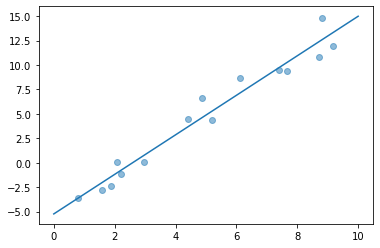

In [14]:
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(5)
x = 10 * rng.rand(15)
y = 2 * x - 5 + rng.randn(15)

model = LinearRegression()
model.fit(x[:, np.newaxis], y)

xs = np.linspace(0, 10, 1000)
ys = model.predict(xs[:, np.newaxis])

plt.scatter(x, y, alpha=0.5)
plt.plot(xs, ys);


In [15]:
# copy the above code cell and change one of the data 
# points to illustrate errors / outliers on the resulting
# model

### Exercise:  Feature scaling

Let's say that TV was measured in dollars, rather than thousands of dollars. How would that affect the model?  Try that and try to explain the results.

In [16]:
# your code:

# scale the data

# train the model and determine the effect on the 
# parameters of the model and its predictions.
